## Introduction
In Munich, cycling is not only a popular mode of transportation but also a critical component of the city's commitment to sustainability and tourism. The aim of this study is to explore how weather influence bike traffic patterns over the year 2020. This is an important problem because understanding how weather and bike traffic are connected can help us make the city better for biking. This research strives to provide data-driven insights that can help enhance cycling infrastructure, promote cycling activities, and contribute to Munich's environmental initiatives.

In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3
pio.renderers


# Connect to the SQLite database
conn = sqlite3.connect('/home/hamza-developer/Documents/GitHub/made-template/data/munich.sqlite')
conn

/home/hamza-developer/Downloads/ENTER/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Methods

In this study, we would like to understand the interplay between various weather conditions and their impact on bike traffic patterns in Munich. To this end, we utilized two chosen datasets that provided granular data suitable for an in-depth comparative analysis.

**Data Sources and Selection Rationale**

- **Historical Weather Data**: This dataset was selected due to its comprehensive coverage of daily weather metrics, including temperature, wind speed, humidity, and sea-level pressure, among others. The rich detail offered by this dataset made it an ideal choice for our analysis, as it contained a variety of indicators that could potentially influence bike usage. In a nutshell, this dataset is very good.

- **Bike Traffic Data**: The second dataset captured the number of bikes passing in Munich. This dataset was critical for gauging the actual bike traffic and correlating it with the weather conditions. So we can eventually use this dataset for whole Munich and this dataset is the only source for Munich which force us to choose.

**Data Pipeline Construction**

A Python-based data pipeline was used to facilitate the ETL (Extract, Transform, Load) process, having the following steps:

- **Data Extraction**: Munich Bike Data was sourced from Kaggle, utilizing a JSON credentials file to automate and streamline the download process. On the other hand, Weather data was sourced from online website which was free. 

- **Data Cleaning and Transformation**: I undertook several cleaning and transformation steps to prepare the data for analysis:
  - **Handling Missing Values**: I identified and addressed gaps in the data by either filling missing values with   appropriate substitutes or removing incomplete records. Most of records were cleaned but I rechecked them all.
  - **Timeframe Standardization**: The data was transformed to focus on a single year, ensuring consistency and relevance in the analysis. So I check for the year of COVID, i.e: 2020.
  - **Date Standardization**: I standardized the date formats across datasets to facilitate accurate merging and analysis. Moreover, I restructured my kaggle dataset of bike from hourly to daily interval.
  - **Feature Selection**: I carefully evaluated the features, removing some of the redundant features and checked correlation, discrepancies to ensure the integrity of our analysis.

**Challenges Encountered**

- One of the challenges involved obtaining the dataset from Kaggle, which was solved by the use of a Kaggle API token for authenticated access.
- Another challenge was aligning the time records from both datasets. This issue was resolved by normalizing the timestamps.

**Data Engineering**

Throughout the data engineering phase, my focus remained totally on preserving data quality and relevance. This approach enabled me to construct a robust dataset that was not only comprehensive but also primed for revealing the meaningful relationships between weather conditions and bike traffic in Munich.

In [2]:
# Retrieve the table names
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()

# Read the tables into Pandas DataFrames
dataframes = {}  
for table in table_names:
    table_name = table[0]
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql_query(query, conn)
    dataframes[table_name] = df

#bikes count datasets
weather_df = dataframes['table_1']
bikes_df = dataframes['table_2']


In [3]:
weather_df.reset_index(inplace=True, drop=True)
weather_df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,conditions
0,2020-01-01,4.4,-2.1,0.7,1.7,-4.2,-1.0,-1.9,83.9,0.0,12.2,100.1,1035.1,1.7,58.0,5.0,3,Clear
1,2020-01-02,3.9,-4.5,-1.6,2.6,-6.7,-2.5,-3.5,88.1,0.0,8.3,305.1,1032.1,7.1,60.2,5.2,3,Clear
2,2020-01-03,8.0,-3.7,2.9,6.3,-5.0,1.2,-1.2,76.3,0.0,21.7,244.9,1027.7,65.0,36.2,3.2,2,"Rain, Partially cloudy"
3,2020-01-04,7.0,2.8,4.3,3.4,-2.0,0.5,1.5,82.2,0.0,24.2,270.8,1030.2,79.5,13.3,1.2,1,"Rain, Partially cloudy"
4,2020-01-05,4.5,-0.6,2.5,3.9,-2.3,0.1,-0.2,82.7,0.0,25.2,272.0,1036.4,44.6,22.5,1.9,1,"Rain, Partially cloudy"


In [4]:
bikes_df.head()

,date,bikes
0,2020-01-01,2649
1,2020-01-02,5363
2,2020-01-03,5343
3,2020-01-04,2812
4,2020-01-05,3318


## Results
The analysis shows several visualizations, including:

1) Time series graph of temperature and bike usage, showing the fluctuation of biking activity with changing weather conditions.
2) Scatter plot of multiple weather factors like UV Index, Wind Speed, Feels like etc against bike usage, indicating a potential correlation.
3) Day-to-day line graph of bike usage, illustrating daily biking trends and identifying peak cycling days.

Lets find all visualizations below


#### Correlation Matrix to Check Features

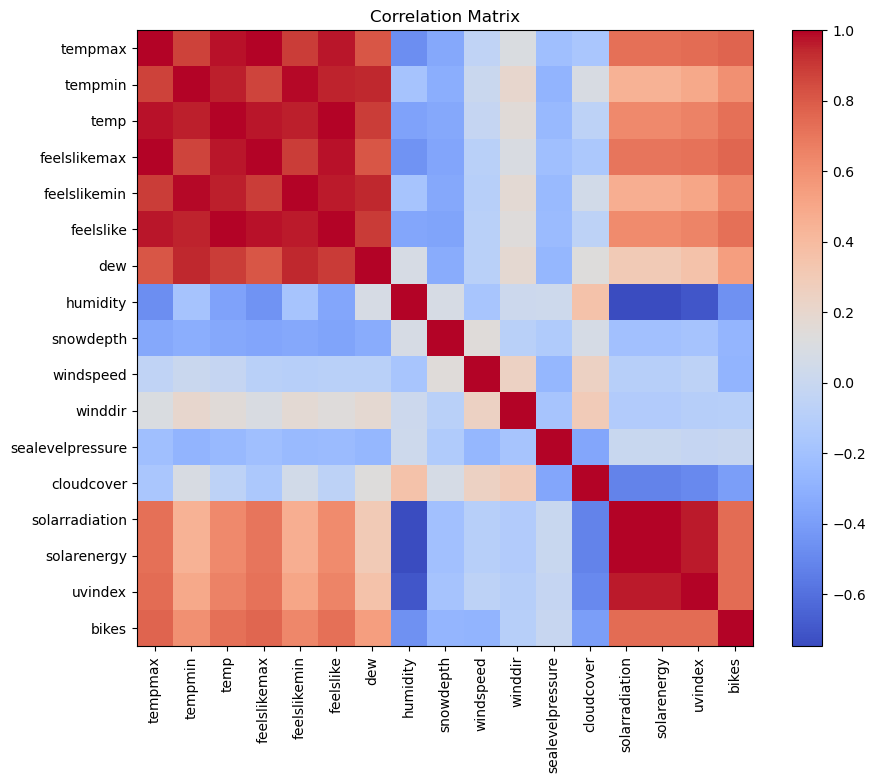

In [5]:
# Convert the 'datetime' column in weather_df to datetime objects
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])
bikes_df['date'] = pd.to_datetime(bikes_df['date'])

merged_df = pd.merge(weather_df, bikes_df, left_on='datetime', right_on='date')
numeric_df = merged_df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

# Create a heatmap of the correlation matrix 
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Set labels and titles
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix')

# Save the heatmap as a PNG image
plt.savefig('correlation_matrix.png', format='png', bbox_inches='tight')

#### Monthly Bike Usage and Temperature Relation

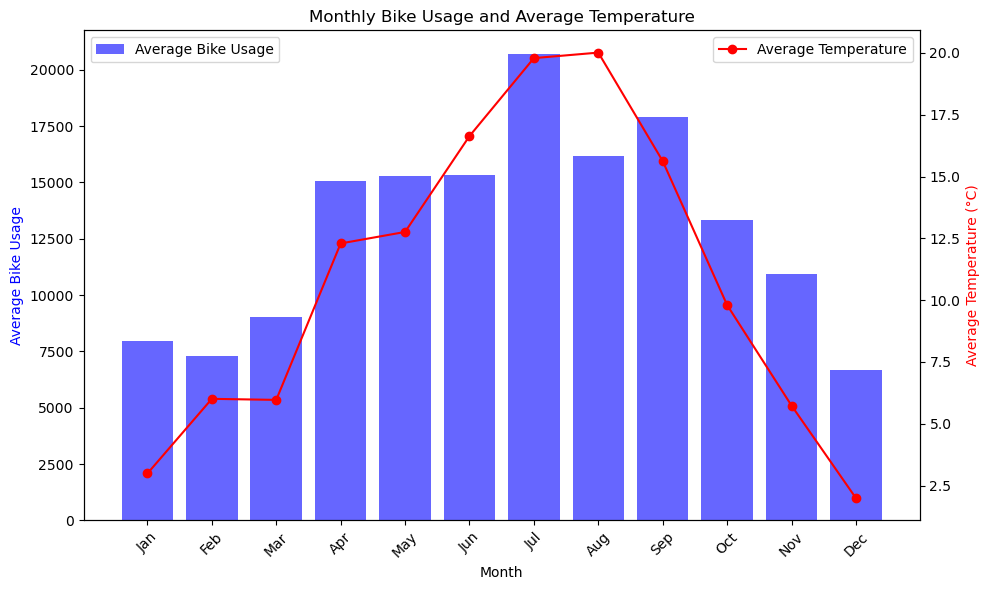

In [6]:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])
bikes_df['date'] = pd.to_datetime(bikes_df['date'])

weather_df.set_index('datetime', inplace=True)
bikes_df.set_index('date', inplace=True)

merged_df = pd.merge(weather_df, bikes_df, left_index=True, right_index=True)

# Now, resample and calculate the mean of 'bikes' and 'temp' by month
monthly_bike_usage = merged_df['bikes'].resample('M').mean()
monthly_temperature = merged_df['temp'].resample('M').mean()

# Create a list of month names
month_names = [date.strftime('%b') for date in monthly_bike_usage.index]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(range(len(monthly_bike_usage)), monthly_bike_usage.values, color='b', alpha=0.6, label='Average Bike Usage')
ax2 = ax1.twinx()
ax2.plot(range(len(monthly_temperature)), monthly_temperature.values, color='r', label='Average Temperature', marker='o')

ax1.set_xlabel('Month')
ax1.set_ylabel('Average Bike Usage', color='b')
ax2.set_ylabel('Average Temperature (°C)', color='r')
plt.title('Monthly Bike Usage and Average Temperature')

ax1.set_xticks(range(len(month_names)))
ax1.set_xticklabels(month_names, rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

#### Bike Usage In Different Conditions of Weather


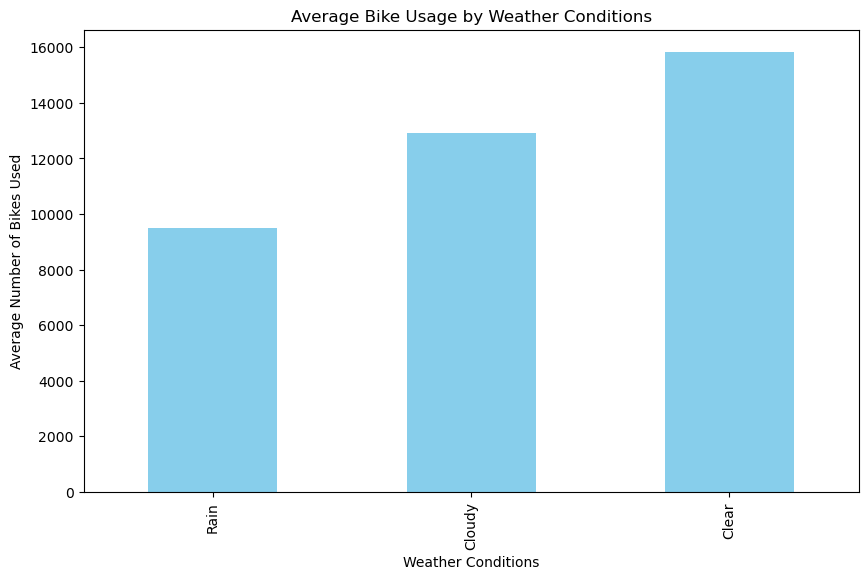

In [7]:
# Defining the simplified weather conditions and categorizing into 3 different categories to simplify analysis
# and get meaningful insights.
conditions_simplified = {
    'Clear': 'Clear',
    'Rain, Partially cloudy': 'Cloudy',
    'Partially cloudy': 'Cloudy',
    'Rain': 'Rain',
    'Snow, Rain, Partially cloudy': 'Rain',
    'Overcast': 'Cloudy',
    'Rain, Overcast': 'Rain',
    'Snow, Rain, Overcast': 'Rain'
}

def simplify_conditions(condition):
    return conditions_simplified.get(condition, 'Other')

merged_df['simple_conditions'] = merged_df['conditions'].apply(simplify_conditions)
average_bike_by_condition = merged_df.groupby('simple_conditions')['bikes'].mean().sort_values()


# Plot the graph
average_bike_by_condition.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Bike Usage by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Average Number of Bikes Used')
plt.show()

#### Scatter Plot of Different Weather Factors

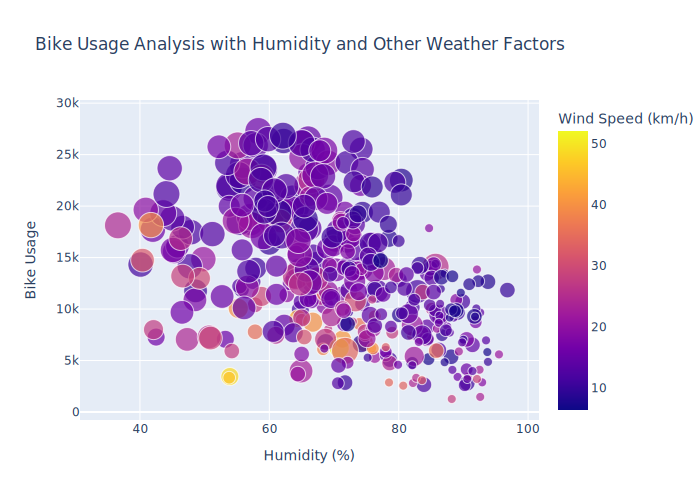

In [14]:
fig = px.scatter(merged_df,
                 x='humidity', y='bikes', size='uvindex',  # Size represents UV index
                 color='windspeed',  # Color represents wind speed
                 hover_data=['temp', 'feelslike', 'cloudcover', 'sealevelpressure'],
                 title='Bike Usage Analysis with Humidity and Other Weather Factors',
                 labels={
                     'humidity': 'Humidity (%)',
                     'bikes': 'Bike Usage',
                     'uvindex': 'UV Index',
                     'windspeed': 'Wind Speed (km/h)'
                 })

fig.show(renderer="svg")

#### Line Graph of Bike usage (Daily basis of week).

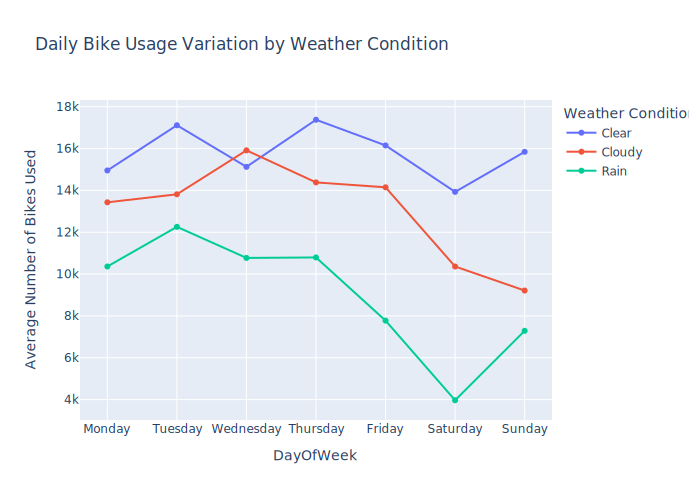

In [13]:
daily_variation = merged_df.groupby([merged_df.index.dayofweek, 'simple_conditions'])['bikes'].mean().unstack()

# Reset index to convert the MultiIndex to columns
daily_variation_reset = daily_variation.reset_index()
daily_variation_reset.rename(columns={daily_variation_reset.columns[0]: 'DayOfWeek'}, inplace=True)

# Melt the DataFrame to have weather conditions as a column and bike counts as values
daily_variation_melted = daily_variation_reset.melt(id_vars='DayOfWeek', var_name='Weather Conditions', value_name='Average Number of Bikes Used')
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
daily_variation_melted['DayOfWeek'] = daily_variation_melted['DayOfWeek'].map(days)

fig = px.line(daily_variation_melted, 
              x='DayOfWeek', 
              y='Average Number of Bikes Used', 
              color='Weather Conditions',
              markers=True,
              title='Daily Bike Usage Variation by Weather Condition')

fig.show(renderer="svg")

#### Summer vs Winter Relation

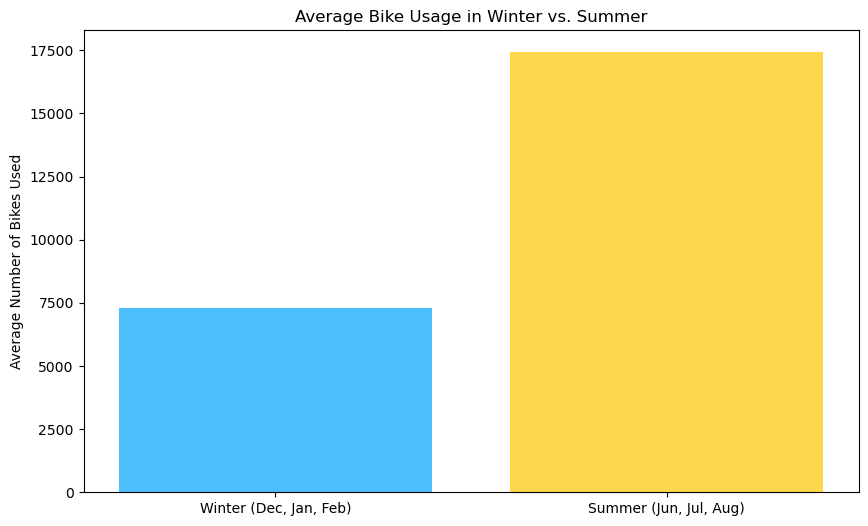

In [11]:
winter_bike_usage_avg = merged_df[merged_df.index.month.isin([12, 1, 2])]['bikes'].mean()
summer_bike_usage_avg = merged_df[merged_df.index.month.isin([6, 7, 8])]['bikes'].mean()

# Define new colors for the bars
winter_color = '#00a6fb' 
summer_color = '#fec601' 

labels = ['Winter (Dec, Jan, Feb)', 'Summer (Jun, Jul, Aug)']
usage = [winter_bike_usage_avg, summer_bike_usage_avg]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, usage, color=[winter_color, summer_color], alpha=0.7)

plt.title('Average Bike Usage in Winter vs. Summer')
plt.ylabel('Average Number of Bikes Used')
plt.show()


## Discussion/Conclusions

Interpretation of Results
The analysis of bike usage in relation to weather conditions in Munich has provided insightful correlations. 

### Key findings include:

1) **Humidity and Bike Usage:** A significant decrease in bike usage was observed on days with high humidity levels. This suggests that discomfort due to humid conditions.

2) **Seasonal Variation in Bike Usage:** A prominent trend observed is the higher bike usage during summer months (June, July, August) compared to winter (December, January, February). This suggests that warmer and more favorable weather conditions in summer.

3) **UV Index Trends:**: Higher UV index values showed a positive correlation with bike usage. This aligns with the general preference for outdoor activities.

4) **Temperature Variations:** Temperature is the primary focus of our analysis as it is very important, the data indicated a peak in bike usage during moderate or bit high temperatures, with a decline observed during extremely cold conditions.

### Limitations
Several limitations must be acknowledged:

1) **Data Scope:** The analysis was confined to a single geographical location and a specific time frame. Expanding the scope to include multiple important and famous locations could provide more generalizable insights.

2) **External Factors:** Factors such as cultural habits, availability of biking infrastructure, and seasonal events were not included, which could influence biking patterns independently of weather conditions.

3) **Measurement Accuracy:** The reliability of weather measurements and bike usage counts is crucial. Any issue in data collection could affect the accuracy of the correlations observed.

### Future Work
For future research, several avenues appear promising:

1) **Broader Geographical Scope:** Expanding the study to include diverse geographical locations would allow for a comparison across different climate zones and biking cultures.

2) **Long-Term Trends:** Analyzing data over multiple years could help in understanding long-term trends and the impact of climate change on biking habits.

3) **Forecasting:** We can forecast the weather, which makes us pre planned for the activities of bikes in any way.This way we can manage our count of bikes and other factors too.

4) **Real-Time Data Analysis:** Implementing a real-time data analysis framework could aid city planners and public health officials in making informed decisions to promote biking under varying weather conditions.


**In conclusion**, while this study has provided valuable insights into the relationship between weather conditions and bike usage, further research is essential to develop a more good understanding of these dynamics and to support the development of data-driven urban planning.
